In [12]:
!pip install git+https://github.com/facebookresearch/segment-anything.git

!pip install torch torchvision opencv-python

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-wm4chj65
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-wm4chj65
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done


In [13]:
!git clone https://github.com/facebookresearch/segment-anything.git

fatal: destination path 'segment-anything' already exists and is not an empty directory.


In [14]:
# Download the pre-trained SAM weights (ViT-H)
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

--2024-09-24 19:44:20--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.172.185.104, 18.172.185.43, 18.172.185.63, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.172.185.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth.1’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G  28.2MB/s    in 36s     

utime(sam_vit_h_4b8939.pth.1): No such file or directory
2024-09-24 19:44:56 (68.8 MB/s) - ‘sam_vit_h_4b8939.pth.1’ saved [2564550879/2564550879]



In [15]:
import torch
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device='cuda')

/usr/local/lib/python3.10/dist-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-31): 32 x Block(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(1280, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d

Saving highway_image.jpg to highway_image.jpg


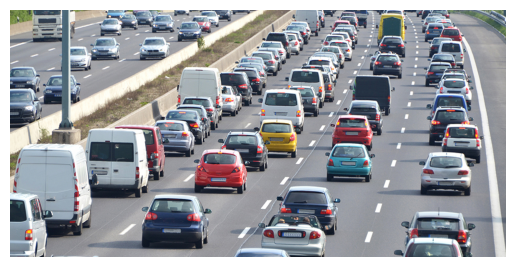

In [16]:
from google.colab import files
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

uploaded = files.upload()
image_path = list(uploaded.keys())[0]

image = Image.open(image_path)
image = np.array(image)

plt.imshow(image)
plt.axis('off')
plt.show()

In [17]:
from segment_anything import SamAutomaticMaskGenerator

mask_generator = SamAutomaticMaskGenerator(sam)

masks = mask_generator.generate(image)

print(f"Number of masks: {len(masks)}")

Number of masks: 250


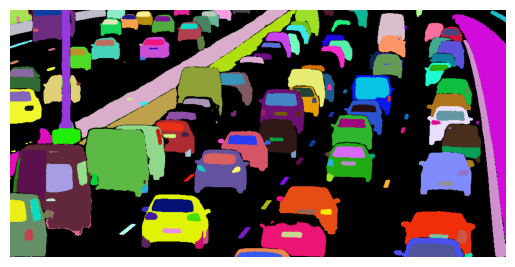

In [18]:
import random

def random_color():
    return [random.randint(0, 255) for _ in range(3)]

rgb_mask = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)

for mask in masks:
    color = random_color()
    mask_indices = mask['segmentation']
    rgb_mask[mask_indices] = color

plt.imshow(rgb_mask)
plt.axis('off')
plt.show()

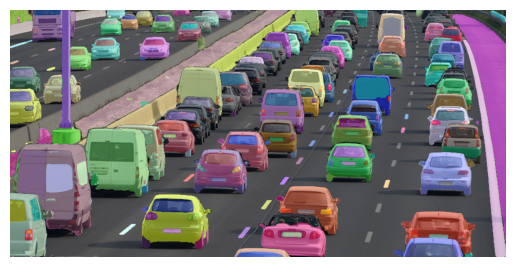

In [19]:
import cv2


alpha = 0.5
overlay = cv2.addWeighted(image, 1 - alpha, rgb_mask, alpha, 0)

plt.imshow(overlay)
plt.axis('off')
plt.show()

In [20]:
result_image = Image.fromarray(overlay)
result_image.save("segmented_highway_cars.png")

files.download("segmented_highway_cars.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>